# What are Decision Trees?

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

Decision tree is a tree shaped diagram used to determinea course of action. Each branch of the tree represents a possible decision, occurence or reaction.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [1]:
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [2]:
display(Image(url='https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-6df15ef/wp-content/uploads/2018/07/what-is-a-decision-tree.png',
              width=700, unconfined=True))

#### Problems that decision tree can solve

**Classification:**

A classification tree will determine a set of logical if-then conditions to classify problems.<br>
For example, discriminating between 3 types of flowers based on certain features.

**Regression:**

Regression tree is used when the target variable is numerical or continuous in nature. We fit a regression model to the target variable using each of the indepentent variables.<br>
Each split is made based on the sum of squared errors.

# How does a decision tree algorithm work?

In [3]:
display(Image(url='https://miro.medium.com/max/700/1*ECd5efKxuSR-CZMIx0kUZA.png', width=700, unconfined=True))

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

In the picture above: it starts with the **Root** node and based on root condition we get 3 branches: C1, C2 and C3 (P.S. branches can be more).<br>

C2 ended up being a leaf node, which means the final decision or a prediction.<br>
C1 and C3 ended up with Condition1 and Condition3. Condition1 and Condition3 are 2 different features and they have 2 features each.

As usual, the categories can be more than that.

#### Classification and Regression Trees (CART) 

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.

## Use Case: Predict the class of the car.
We will build two models, one with criterion *gini index* and another one with criterion *entropy*.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

# Visualize decision-trees with graphviz
import graphviz

We make some assumptions while implementing the Decision-Tree algorithm.<br>
These are listed below:

* At the beginning, the whole training set is considered as the root.
* Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

### Attribute selection measures

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. <br>They are as follows:

* Information gain

* Gini index

For more details read (https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial)

In [5]:
data = pd.read_csv('car_evaluation.csv')
print(data.shape)
data.head()

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
# Split data into separate training and test set 
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1208, 6), (519, 6))

### Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [12]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low
...,...,...,...,...,...,...
1130,med,med,3,more,big,low
1294,med,low,5more,more,big,high
860,high,low,5more,more,big,low
1459,low,high,4,2,small,high


As we can see that all the variables are ordinal categorical data type.

In [13]:
# import category encoders
import category_encoders

# encode variables with ordinal encoding
encoder = category_encoders.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [15]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


### Decision Tree Classifier with criterion gini index

In [16]:
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# fit the model
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
# make prediction
y_pred_gini = classifier_gini.predict(X_test)

In [18]:
print('Model accuracy score with criterion gini index: {0:0.3f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.815


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy**<br>
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [19]:
y_pred_train_gini = classifier_gini.predict(X_train)
y_pred_train_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [20]:
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.801


Check for overfitting and underfitting

In [21]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier_gini.score(X_test, y_test)))

Training set score: 0.8013
Test set score: 0.8150


Here, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

[Text(0.6666666666666666, 0.875, 'X[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

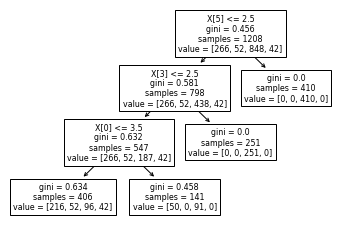

In [22]:
tree.plot_tree(classifier_gini.fit(X_train, y_train))

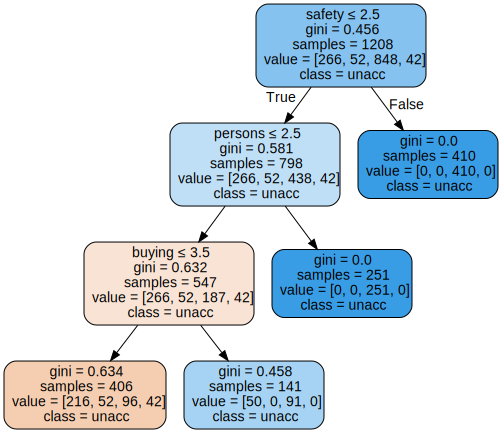

In [23]:
dot_data_gini = tree.export_graphviz(classifier_gini, out_file=None,
                                feature_names=X_train.columns,
                               class_names=y_train,
                               filled=True, rounded=True,
                               special_characters=True)

graph_gini = graphviz.Source(dot_data_gini)
graph_gini

### Decision Tree Classifier with criterion entropy

In [24]:
# instantiate the DecisionTreeClassifier model with criterion entropy

classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [25]:
# make predicitons
y_pred_entropy = classifier_entropy.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.3f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.815


In [26]:
# Compare the train-set and test-set accuracy
y_pred_train_entropy = classifier_entropy.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_entropy)))

Training-set accuracy score: 0.8013


In [27]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(classifier_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier_entropy.score(X_test, y_test)))

Training set score: 0.8013
Test set score: 0.8150


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150. These two values are quite comparable. So, there is no sign of overfitting.

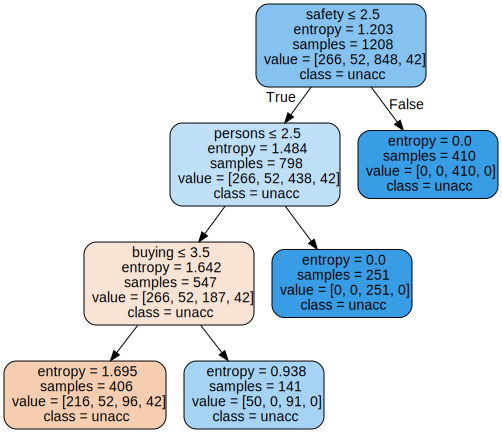

In [28]:
dot_data_entropy = tree.export_graphviz(classifier_entropy, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph_entropy = graphviz.Source(dot_data_entropy) 

graph_entropy 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [29]:
cm = confusion_matrix(y_test, y_pred_entropy)
cm

array([[ 96,   0,  22,   0],
       [ 17,   0,   0,   0],
       [ 34,   0, 327,   0],
       [ 23,   0,   0,   0]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.56      0.81      0.67       118
        good       0.00      0.00      0.00        17
       unacc       0.94      0.91      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.82       519
   macro avg       0.38      0.43      0.40       519
weighted avg       0.78      0.82      0.79       519



## Conclusion

1. In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8150.
2. In the model with criterion gini index, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8013 while the test-set accuracy to be 0.8150.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5. The confusion matrix and classification report yields very good model performance.